# Text Classification Using Decision Tree

The [Sentiment Labelled Sentences Data Set](http://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences) is the data set from [UCI](http://archive.ics.uci.edu/ml/index.php). It provides many data sets which good for praticing Machine Learning.

**Citation** 'From Group to Individual Labels using Deep Features', Kotzias et. al,. KDD 2015

-----------------------------------
**Data Set Information:**

This dataset was created for the Paper 'From Group to Individual Labels using Deep Features', Kotzias et. al,. KDD 2015 
Please cite the paper if you want to use it :) 

It contains sentences labelled with positive or negative sentiment. 

**Format: ** sentence score 

**Details: **

Score is either 1 (for positive) or 0 (for negative)	
The sentences come from three different websites/fields:  

*   imdb.com
*   amazon.com
*   yelp.com

For each website, there exist 500 positive and 500 negative sentences. Those were selected randomly for larger datasets of reviews. 
We attempted to select sentences that have a clearly positive or negative connotaton, the goal was for no neutral sentences to be selected. 

**Attribute Information:**

The attributes are text sentences, extracted from reviews of products, movies, and restaurants

-----------------------------
**Download Data Set**

!wget to download the dataset and unzip the file.

In [0]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip -O sentiment.zip

--2019-12-09 05:00:31--  http://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84188 (82K) [application/x-httpd-php]
Saving to: ‘sentiment.zip’

sentiment.zip       100%[===================>]  82.21K   540KB/s    in 0.2s    

2019-12-09 05:00:32 (540 KB/s) - ‘sentiment.zip’ saved [84188/84188]



In [0]:
!unzip -o 'sentiment.zip'

Archive:  sentiment.zip
  inflating: sentiment labelled sentences/.DS_Store  
  inflating: __MACOSX/sentiment labelled sentences/._.DS_Store  
  inflating: sentiment labelled sentences/amazon_cells_labelled.txt  
  inflating: sentiment labelled sentences/imdb_labelled.txt  
  inflating: __MACOSX/sentiment labelled sentences/._imdb_labelled.txt  
  inflating: sentiment labelled sentences/readme.txt  
  inflating: __MACOSX/sentiment labelled sentences/._readme.txt  
  inflating: sentiment labelled sentences/yelp_labelled.txt  
  inflating: __MACOSX/._sentiment labelled sentences  


In [0]:
#Import library
import pandas as pd
import numpy as np
import graphviz
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [0]:
#Import dataset
filepath = './sentiment labelled sentences/amazon_cells_labelled.txt'
df = pd.read_csv(filepath, names=['sentence', 'label'], sep='\t')

## Showing Dataset

For this example, we are using the 'amazon.com' data set. (amazon_cells_labelled.txt)

In [0]:
print("Data size:" , df.shape)

Data size: (1000, 2)


In [0]:
df[:10]

,sentence,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


In [0]:
tf = ['Neg', 'Pos']
for i in range(10):
  print(i, f'\t{tf[df.iloc[i].label]}\t', df.iloc[i].sentence)

0 	Neg	 So there is no way for me to plug it in here in the US unless I go by a converter.
1 	Pos	 Good case, Excellent value.
2 	Pos	 Great for the jawbone.
3 	Neg	 Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!
4 	Pos	 The mic is great.
5 	Neg	 I have to jiggle the plug to get it to line up right to get decent volume.
6 	Neg	 If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.
7 	Pos	 If you are Razr owner...you must have this!
8 	Neg	 Needless to say, I wasted my money.
9 	Neg	 What a waste of money and time!.


Here the imported dataframe is separated into two objects; sentences as X and label as Y. Then, they are split into train and test set (20% of the data set).

In [0]:
sentences = df['sentence'].values
y = df['label'].values

In [0]:
#Split train and test set 
sentences_train, sentences_test, y_train, y_test = train_test_split(
    sentences, y, test_size=0.2, random_state=1000)
print('sentences_train ', sentences_train.shape)
print('sentences_test \t', sentences_test.shape)
print('y_train \t', y_train.shape)
print('y_test  \t', y_test.shape)

sentences_train  (800,)
sentences_test 	 (200,)
y_train 	 (800,)
y_test  	 (200,)


Since the data is text, it needs to be converted to vector. So, features can be extracted from the data set. 

In [0]:
#Features from text
vectorizer = CountVectorizer(stop_words='english', token_pattern='(?u)\\b[a-zA-Z][a-zA-Z]+\\b')
vectorizer.fit(sentences_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b[a-zA-Z][a-zA-Z]+\\b',
                tokenizer=None, vocabulary=None)

In [0]:
print(vectorizer.get_feature_names()[:30])

['abhor', 'ability', 'able', 'abound', 'absolutel', 'absolutely', 'accept', 'acceptable', 'access', 'accessable', 'accessoryone', 'accidentally', 'accompanied', 'according', 'activate', 'activated', 'activesync', 'actually', 'ad', 'adapter', 'adapters', 'add', 'addition', 'address', 'adhesive', 'adorable', 'advertised', 'advise', 'ago', 'alarm']


`CountVectorizer` converts a collection of text documents to a matrix of token counts

If you do not provide an a-priori dictionary and you do not use an analyzer that does some kind of feature selection then the number of features will be equal to the vocabulary size found by analyzing the data.

For more details, see https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [0]:
vectorizer = CountVectorizer(stop_words='english', token_pattern='(?u)\\b[a-zA-Z][a-zA-Z]+\\b')
vectorizer.fit(sentences_train)
print(vectorizer.get_feature_names()[:30])

['abhor', 'ability', 'able', 'abound', 'absolutel', 'absolutely', 'accept', 'acceptable', 'access', 'accessable', 'accessoryone', 'accidentally', 'accompanied', 'according', 'activate', 'activated', 'activesync', 'actually', 'ad', 'adapter', 'adapters', 'add', 'addition', 'address', 'adhesive', 'adorable', 'advertised', 'advise', 'ago', 'alarm']


### Bag of Words

Use the (frequency of) occurrence of each word (in the vocabulary) to represent the documents/sentences.

![bow](https://miro.medium.com/max/1024/1*j3HUg18QwjDJTJwW9ja5-Q.png)

In [0]:
analyze = vectorizer.build_analyzer()
print(sentences_train[0])
analyze(sentences_train[0]) 

I love the look and feel of Samsung flipphones.


['love', 'look', 'feel', 'samsung', 'flipphones']

In [0]:
#Features from text
vectorizer = CountVectorizer(stop_words='english', token_pattern='(?u)\\b[a-zA-Z][a-zA-Z]+\\b')
vectorizer.fit(sentences_train)
X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)

In [0]:
print(X_train.toarray()[:10])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [0]:
print(X_test.toarray()[:10])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## Apply Decision Tree 

[Sklearn Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

First, Gini impurity is used as supported criteria.

Make an instance model

In [0]:
# Train decision tree (gini)
clf_gini = tree.DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=3, min_samples_leaf=5) 

Training the model on the data, storing the weights learned from the data

In [0]:
clf_gini = clf_gini.fit(X_train, y_train)

Predict the labels of new data

In [0]:
y_pred_gini = clf_gini.predict(X_test)

In [0]:
# Show output from decision tree (gini)
df_output_gini = pd.DataFrame({'Sentences_test':sentences_test,
                          'Prediction_labelled':y_pred_gini,
                        'Actual_labelled':y_test})
df_output_gini[:10]

,Sentences_test,Prediction_labelled,Actual_labelled
0,Beautiful styling though.,0,1
1,"jabra ear gels ""R"" the best!.",0,1
2,"Simple, lightweight and great fit.",1,1
3,I ordered this product first and was unhappy w...,0,0
4,Everything about this product is wrong.First,0,0
5,Perfect for the PS3.,0,1
6,I like design and look of Jabra behing the ear...,0,1
7,"Excellent product, I am very satisfied with th...",1,1
8,The screen does get smudged easily because it ...,0,0
9,Disappointing accessory from a good manufacturer.,1,0


## Measure the performance of the model

Define the function for calculating accuracy which will be used later.

In [0]:
# Function to calculate accuracy 
def cal_accuracy(y_test, y_pred): 
      
    print("Confusion Matrix: ", 
        confusion_matrix(y_test, y_pred)) 
      
    print ("Accuracy : ", 
    accuracy_score(y_test,y_pred)*100) 
      
    print("Report : ", 
    classification_report(y_test, y_pred)) 

### Confusion Matrix

Text(83.40000000000006, 0.5, 'Predicted label')

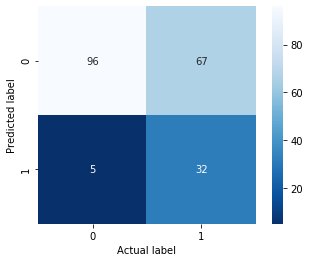

In [0]:
cf_mat_gini = confusion_matrix(y_test, y_pred_gini)
sns.heatmap(cf_mat_gini.T, square=True, annot=True, fmt='d', cbar=True, cmap='Blues_r')
plt.xlabel('Actual label')
plt.ylabel('Predicted label')

In [0]:
# Prediction using gini 
print("Results Using Gini Index:") 
cal_accuracy(y_test, y_pred_gini)       

Results Using Gini Index:
Confusion Matrix:  [[96  5]
 [67 32]]
Accuracy :  64.0
Report :                precision    recall  f1-score   support

           0       0.59      0.95      0.73       101
           1       0.86      0.32      0.47        99

    accuracy                           0.64       200
   macro avg       0.73      0.64      0.60       200
weighted avg       0.73      0.64      0.60       200



## Plot the decision tree using Graphviz

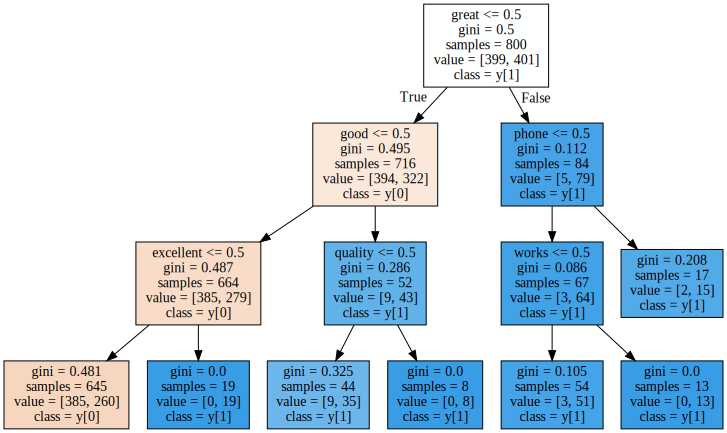

In [0]:
# Plot decision tree (gini) by Graphviz
plot_gini = tree.export_graphviz(clf_gini, out_file=None,
                                feature_names=vectorizer.get_feature_names(),
                                 class_names=True,
                                filled = True)
graph_gini = graphviz.Source(plot_gini)
graph_gini

Second, the information gain (entropy) is used as supported criteria.

Make an instance model

In [0]:
#Train decision tree (entropy)
clf_entropy = tree.DecisionTreeClassifier( 
            criterion = "entropy", random_state = 100, 
            max_depth = 3, min_samples_leaf = 5) 

Training the model on the data, storing the weights learned from the data

In [0]:
clf_entropy = clf_entropy.fit(X_train, y_train)

Predict the labels of new data

In [0]:
y_pred_entropy = clf_entropy.predict(X_test)

In [0]:
#Show output from decision tree (entropy)
df_output_entropy = pd.DataFrame({'Sentences_test':sentences_test,
                          'Prediction_labelled':y_pred_entropy,
                        'Actual_labelled':y_test})
df_output_entropy[:10]

,Sentences_test,Prediction_labelled,Actual_labelled
0,Beautiful styling though.,0,1
1,"jabra ear gels ""R"" the best!.",0,1
2,"Simple, lightweight and great fit.",1,1
3,I ordered this product first and was unhappy w...,0,0
4,Everything about this product is wrong.First,0,0
5,Perfect for the PS3.,0,1
6,I like design and look of Jabra behing the ear...,0,1
7,"Excellent product, I am very satisfied with th...",1,1
8,The screen does get smudged easily because it ...,0,0
9,Disappointing accessory from a good manufacturer.,1,0


## Measure the performance of the model

### Confusion Matrix



Text(83.40000000000006, 0.5, 'Predicted label')

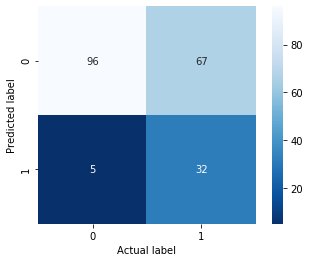

In [0]:
cf_mat_entropy = confusion_matrix(y_test, y_pred_entropy)
sns.heatmap(cf_mat_entropy.T, square=True, annot=True, fmt='d', cbar=True, cmap='Blues_r')
plt.xlabel('Actual label')
plt.ylabel('Predicted label')

In [0]:
# Prediction using entropy 
print("Results Using Entropy:")  
cal_accuracy(y_test, y_pred_entropy) 

Results Using Entropy:
Confusion Matrix:  [[96  5]
 [67 32]]
Accuracy :  64.0
Report :                precision    recall  f1-score   support

           0       0.59      0.95      0.73       101
           1       0.86      0.32      0.47        99

    accuracy                           0.64       200
   macro avg       0.73      0.64      0.60       200
weighted avg       0.73      0.64      0.60       200



## Plot the decision tree using Graphviz

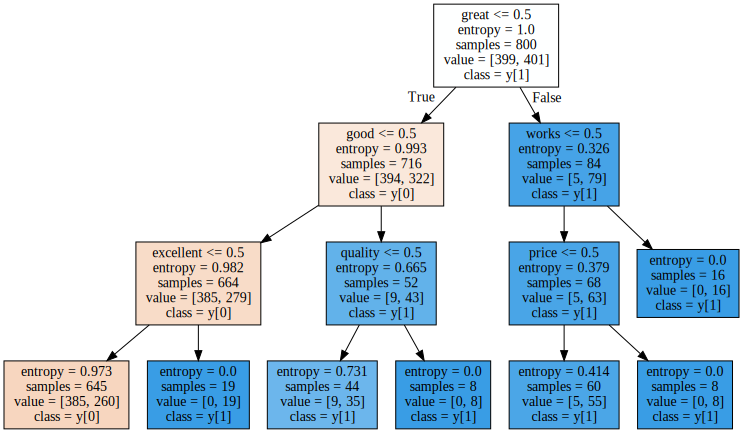

In [0]:
# Plot decision tree (entropy) by Graphviz
plot_entropy = tree.export_graphviz(clf_entropy, out_file=None,
                                   feature_names=vectorizer.get_feature_names(),
                                    class_names=True,
                                   filled = True)
graph_entropy = graphviz.Source(plot_entropy)
graph_entropy